In [ ]:
# setup the enviroment
!pip install -q transformers
!pip install -q datasets
!pip install -q monai
!pip install -q Pillow # for jetson, for some reason, I need another version but then it breaks the plotting wouldn't work

In [ ]:
import os
cwd = os.getcwd()
print(cwd)

WORK_DIR = cwd+'/work/MultiModal'
print(WORK_DIR)

/content
/content/work/MultiModal


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import and check the data
from datasets import load_dataset, Image
# When using Google Drive, use this
ROOT_PATH = ('/content/drive/MyDrive/work/MultiModal')
DATA_PATH = (ROOT_PATH +'/data/one_class_flipped/train')
#print("Check DATA_PATH :" + DATA_PATH)

#ROOT_PATH = WORK_DIR
#DATA_PATH = ROOT_PATH + '/data/sentinel1_aug_data'

dataset = load_dataset(path=DATA_PATH, split='train')

# dataset = dataset.train_test_split(test_size=0.2)

dataset

Resolving data files:   0%|          | 0/401 [00:00<?, ?it/s]

Dataset({
    features: ['image'],
    num_rows: 400
})

In [ ]:
dataset.features

{'image': Image(mode=None, decode=True, id=None)}

In [ ]:
import pandas as pd
# check classes
CSV_PATH = DATA_PATH + "/_classes.csv"
print("Check CSV_PATH :" + CSV_PATH)

df = pd.read_csv(CSV_PATH)
df

Check CSV_PATH :/content/drive/MyDrive/work/MultiModal/data/one_class_flipped/train/_classes.csv


,Pixel Value,Class
0,0,background
1,1,water


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x140 at 0x7D7BED769EA0>}
/content/drive/MyDrive/work/MultiModal/data/one_class_flipped/train/sentinel1_VH_20231009_png.rf.00c7d346066b9532fc0a9df86539462b.jpg


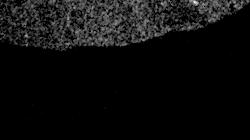

In [ ]:
# check and plot an example image

sample = dataset[0]
print(sample)

sample_image = sample['image']
sample_image_filename = sample_image.filename
print(sample_image_filename)
sample_image


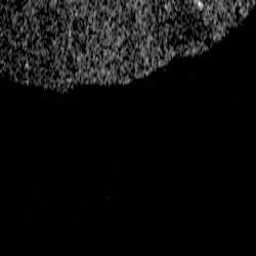

In [ ]:
# experiment: resizing
resized_sample_image = sample_image.resize((256, 256))
resized_sample_image

array([[[ 30,  30,  30],
        [ 22,  22,  22],
        [  1,   1,   1],
        ...,
        [101, 101, 101],
        [ 81,  81,  81],
        [ 37,  37,  37]],

       [[ 30,  30,  30],
        [ 15,  15,  15],
        [  3,   3,   3],
        ...,
        [107, 107, 107],
        [ 90,  90,  90],
        [ 43,  43,  43]],

       [[ 31,  31,  31],
        [  4,   4,   4],
        [  8,   8,   8],
        ...,
        [118, 118, 118],
        [104, 104, 104],
        [ 54,  54,  54]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
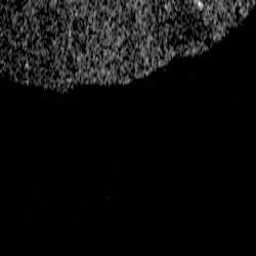

In [ ]:
# experiment: convert to rgb
import numpy as np

resized_sample_image_rgb = resized_sample_image.convert("RGB")
resized_sample_image_rgb
resized_sample_image_rgb_array = np.array(resized_sample_image_rgb)
resized_sample_image_rgb_array

In [ ]:
from PIL import Image
# check and plot example mask
sample_mask_path = sample_image_filename.replace(".jpg", "_mask.png")
print(sample_mask_path)


/content/drive/MyDrive/work/MultiModal/data/one_class_flipped/train/sentinel1_VH_20231009_png.rf.00c7d346066b9532fc0a9df86539462b_mask.png


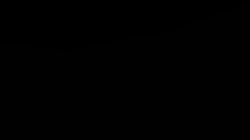

In [ ]:
sample_mask_img = Image.open(sample_mask_path)
sample_mask_img

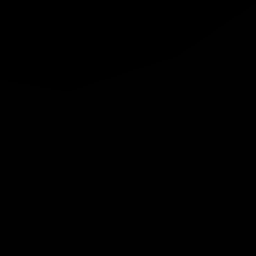

In [ ]:
# experiment resizing mask
resized_sample_mask_img = sample_mask_img.resize((256,256))
resized_sample_mask_img

In [ ]:
# turning images into numpy and printing the arrays

from PIL import Image
from numpy import asarray

print("----- GROUND TRUTH -----")

np_image = asarray(resized_sample_image_rgb)
print(np_image)
print(np_image.shape)

print("----- MASK -----")


np_mask = asarray(resized_sample_mask_img)
print(np_mask)
print(np_mask.shape)

----- GROUND TRUTH -----
[[[ 30  30  30]
  [ 22  22  22]
  [  1   1   1]
  ...
  [101 101 101]
  [ 81  81  81]
  [ 37  37  37]]

 [[ 30  30  30]
  [ 15  15  15]
  [  3   3   3]
  ...
  [107 107 107]
  [ 90  90  90]
  [ 43  43  43]]

 [[ 31  31  31]
  [  4   4   4]
  [  8   8   8]
  ...
  [118 118 118]
  [104 104 104]
  [ 54  54  54]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
(256, 256, 3)
----- MASK -----
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(256, 256)


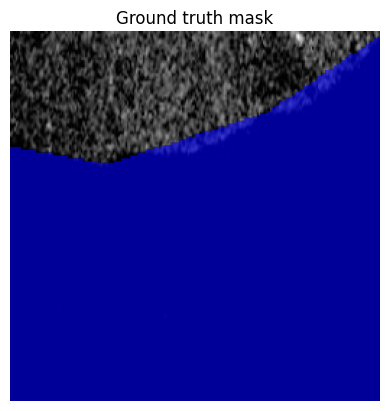

In [ ]:
# plot ground truth and mask of the example image

import matplotlib.pyplot as plt
import numpy as np

def show_mask(mask, ax):
    # define colors for the three classes (maybe rather just black and white?)
    water_color = np.array([0, 0, 1, 0.6]) # water

    # get height and weight from the mask
    h,w = mask.shape[-2:]

    # create an empty image with the same height and
    # width but with 4th channel (Alpha)
    mask_image = np.zeros((h, w, 4))

    # apply the colors based on the mask value

    mask_image[mask == 1] = water_color

    ax.imshow(mask_image)

fig, axes = plt.subplots()

axes.imshow(np.array(resized_sample_image))

ground_truth_seg = np_mask

show_mask(ground_truth_seg, axes)

axes.title.set_text("Ground truth mask")
axes.axis("off")

plt.show()

In [ ]:
def get_bounding_box(ground_truth_map):
    # get indices of the positive mask area
    y_indices, x_indices = np.where(ground_truth_map > 0)

    if len(x_indices) == 0 or len(y_indices) == 0:
        # If no positive pixels are found, return a default box or raise an error
        return [0, 0, 0, 0]  # or handle as needed

    x_min, x_max = np.min(x_indices), np.max(x_indices)
    y_min, y_max = np.min(y_indices), np.max(y_indices)

    H, W = ground_truth_map.shape

    # Apply perturbation, keeping within bounds
    x_min = max(0, x_min - np.random.randint(0, 20))
    x_max = min(W, x_max + np.random.randint(0, 20))
    y_min = max(0, y_min - np.random.randint(0, 20))
    y_max = min(H, y_max + np.random.randint(0, 20))

    bbox = [x_min, y_min, x_max, y_max]
    return bbox





In [ ]:
# testing to improve understanding
y_indices, x_indices = np.where(ground_truth_seg > 0)
x_min, x_max = np.min(x_indices), np.max(x_indices)
y_min, y_max = np.min(y_indices), np.max(y_indices)
H, W = ground_truth_seg.shape
x_min = max(0, x_min - np.random.randint(0, 20))
x_max = min(W, x_max + np.random.randint(0, 20))
y_min = max(0, y_min - np.random.randint(0, 20))
y_max = min(H, y_max + np.random.randint(0, 20))

print('y_indices: ' + str(y_indices))
print('x_indices: ' + str(x_indices))
print('x_min: ' + str(x_min))
print('x_max: ' + str(x_max))
print('y_min: ' + str(y_min))
print('y_max: ' + str(y_max))
print('H: ' + str(H))
print('W: ' + str(W))

y_indices: [  4   4   5 ... 255 255 255]
x_indices: [254 255 251 ... 253 254 255]
x_min: 0
x_max: 256
y_min: 0
y_max: 256
H: 256
W: 256


In [ ]:
import os
import numpy as np
from numpy import asarray
# create custom Pytorch dataset

from torch.utils.data import Dataset
import torch

MASK_SUFFIX = "_mask.png"
SIZE = (256, 256)

class SAMDataset(Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__ (self, idx):
    item = self.dataset[idx]
    image = item["image"]
    image_path = image.filename
    image = image.resize(SIZE)
    image_rgb = image.convert("RGB")

    mask_path = image_path.replace(".jpg", MASK_SUFFIX)
    mask = Image.open(mask_path)
    mask = mask.resize(SIZE)
    mask_array = asarray(mask)


    ground_truth_mask = torch.from_numpy(np.array(mask, copy=True))

    # get bounding box
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image_rgb, input_boxes=[[prompt]],
                            return_tensors="pt")

    # remove batch dimension (processor adds this by default)
    # (Batch, Channels, Height, Width)
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs





In [ ]:
# download the processor

from transformers import SamProcessor

processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
print(processor)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [ ]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)


In [ ]:
# experiment: check some data
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)


pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask torch.Size([256, 256])


In [ ]:
# create pytorch dataloader

from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)


In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([4, 3, 1024, 1024])
original_sizes torch.Size([4, 2])
reshaped_input_sizes torch.Size([4, 2])
input_boxes torch.Size([4, 1, 4])
ground_truth_mask torch.Size([4, 256, 256])


In [ ]:
batch["ground_truth_mask"].shape

torch.Size([4, 256, 256])

In [ ]:
# load the model

from transformers import SamModel

model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure to only compute gradients for mask decoder

for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad = False


config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [ ]:
import os
import torch
from tqdm import tqdm
from statistics import mean
from torch.optim import Adam
from torch.nn.functional import normalize
from torch.utils.data import DataLoader
import numpy as np

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
model.to(device)

# Optimizer
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-4, weight_decay=0)

# Loss function
seg_loss = torch.nn.BCEWithLogitsLoss()

# Training parameters
num_epochs = 5  # Set higher for full training

# Function to compute bounding box with added perturbation
def get_bounding_box(ground_truth_map):
    y_indices, x_indices = np.where(ground_truth_map > 0)
    if len(x_indices) == 0 or len(y_indices) == 0:
        return [0, 0, 0, 0]  # Return empty box for blank masks

    x_min, x_max = np.min(x_indices), np.max(x_indices)
    y_min, y_max = np.min(y_indices), np.max(y_indices)

    H, W = ground_truth_map.shape
    x_min = max(0, x_min - np.random.randint(0, 20))
    x_max = min(W, x_max + np.random.randint(0, 20))
    y_min = max(0, y_min - np.random.randint(0, 20))
    y_max = min(H, y_max + np.random.randint(0, 20))

    return [x_min, y_min, x_max, y_max]

# Training loop
for epoch in range(num_epochs):
    epoch_losses = []
    model.train()
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        # Move data to device
        pixel_values = batch["pixel_values"].to(device)
        input_boxes = batch["input_boxes"].to(device)
        ground_truth_mask = batch["ground_truth_mask"].float().to(device)

        # Forward pass
        outputs = model(pixel_values=pixel_values, input_boxes=input_boxes, multimask_output=False)

        # Compute loss
        predicted_mask = outputs.pred_masks.squeeze(1)  # Ensure mask has same dimensions as ground truth
        loss = seg_loss(predicted_mask, ground_truth_mask.unsqueeze(1))

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    # Print epoch loss
    avg_loss = mean(epoch_losses)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# Save the model and optimizer state
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, "tl_sam_model_single.pth")


Using device: cuda


Epoch 1/5: 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]


Epoch 1, Loss: 0.2131


Epoch 2/5: 100%|██████████| 100/100 [03:29<00:00,  2.10s/it]


Epoch 2, Loss: 0.1482


Epoch 3/5: 100%|██████████| 100/100 [03:29<00:00,  2.10s/it]


Epoch 3, Loss: 0.0800


Epoch 4/5: 100%|██████████| 100/100 [03:30<00:00,  2.10s/it]


Epoch 4, Loss: 0.0505


Epoch 5/5: 100%|██████████| 100/100 [03:30<00:00,  2.10s/it]


Epoch 5, Loss: 0.0564


In [ ]:
# Test inference
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from transformers import SamModel
from torchvision import transforms

# Load pre-trained model and checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-base")
checkpoint_path = ROOT_PATH + "/models/tl_sam_model_single.pth"
checkpoint = torch.load(checkpoint_path, map_location=torch.device(device))
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

In [ ]:
# Test image index and dataset
idx = 6
test_image = dataset[idx]["image"]

mask_file_name = dataset[idx]["image"].filename.replace(".jpg", "_mask.png")
test_mask = Image.open(mask_file_name)


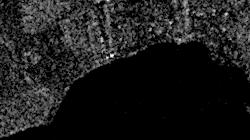

In [ ]:
test_image


array([[[ 24,  24,  24],
        [ 64,  64,  64],
        [ 10,  10,  10],
        ...,
        [ 40,  40,  40],
        [ 81,  81,  81],
        [ 83,  83,  83]],

       [[ 67,  67,  67],
        [ 38,  38,  38],
        [  0,   0,   0],
        ...,
        [ 29,  29,  29],
        [ 47,  47,  47],
        [ 84,  84,  84]],

       [[ 63,  63,  63],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [ 30,  30,  30],
        [ 71,  71,  71],
        [110, 110, 110]],

       ...,

       [[ 62,  62,  62],
        [ 50,  50,  50],
        [ 28,  28,  28],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  8,   8,   8],
        [  4,   4,   4],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
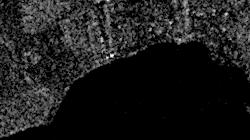

In [ ]:
test_image_nparr = np.array(test_image)
test_image_nparr

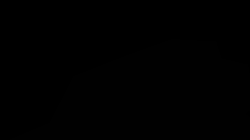

In [ ]:
test_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)
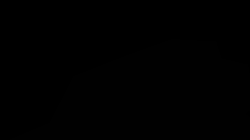

In [ ]:
test_mask_nparr = np.array(test_mask)
test_mask_nparr

In [ ]:
# Convert the ground truth mask to numpy array
ground_truth_mask = np.array(test_mask)

# Get bounding box from ground truth mask
prompt = get_bounding_box(ground_truth_mask)
# get box prompt

prompt = get_bounding_box(ground_truth_mask)

# Prepare input image and bounding box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt").to(device)
for k, v in inputs.items():
    print(k, v.shape)

# Set model to evaluation mode
model.eval()
with torch.no_grad():
    # Perform inference
    outputs = model(**inputs, multimask_output=True)

# Apply sigmoid to convert logits to probabilities
tl_sam_seg_prob = torch.sigmoid(outputs.pred_masks[0, 0, :, :])  # Corrected indexing

# Convert probabilities to binary mask using a threshold
tl_sam_seg = (tl_sam_seg_prob > 0.5).cpu().numpy().squeeze()

pixel_values torch.Size([1, 3, 1024, 1024])
original_sizes torch.Size([1, 2])
reshaped_input_sizes torch.Size([1, 2])
input_boxes torch.Size([1, 1, 4])


In [ ]:
print("Shape of pred_masks:", outputs.pred_masks.shape)

Shape of pred_masks: torch.Size([1, 1, 3, 256, 256])


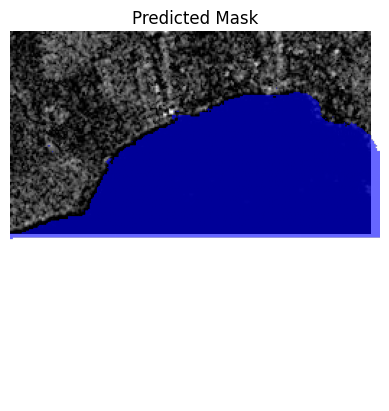

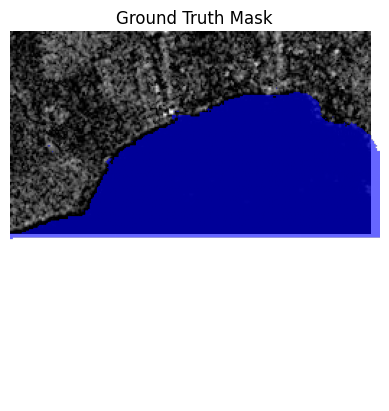

In [ ]:
# prepare image and box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt").to(device)

model.eval()
with torch.no_grad():
    # perform inference
    outputs = model(**inputs, multimask_output=True)

# apply sigmoid to convert logits to probabilities, if necessary?
tl_sam_seg_prob = torch.sigmoid(outputs.pred_masks[0, 0, 0])
tl_sam_seg_prob = tl_sam_seg_prob.cpu().numpy().squeeze()

# convert probabilities to binary mask (0 or 1) for thresholding
tl_sam_seg = (tl_sam_seg_prob > 0.5).astype(np.uint8)

# plot predicted mask
fig, ax_pred = plt.subplots()
ax_pred.imshow(np.array(test_image))
show_mask(tl_sam_seg, ax_pred)
ax_pred.title.set_text("Predicted Mask")
ax_pred.axis("off")

# plot ground truth mask
fig, ax_gt = plt.subplots()
ax_gt.imshow(np.array(test_image))
show_mask(tl_sam_seg, ax_gt)
ax_gt.title.set_text("Ground Truth Mask")
ax_gt.axis("off")

plt.show()
